In [1]:
import numpy as np
import matplotlib.pyplot as plt
from styrene.reactor import MultiBed

Test radial flow

In [2]:
IVP_RTOL = 1e-6

test_reac = MultiBed()
test_reac.add_radial_bed(72950)
test_reac.set_inlet(T=886, P=1.25)
test_reac.add_radial_bed(82020)
test_reac.add_radial_bed(78330)
test_reac.add_resets(2, T=898.2)
test_reac.add_resets(3, T=897.6)

In [3]:
%%time
test_reac.solve()
print(test_reac.outlet)

{'Feb': 99.91423440731926, 'Fst': 495.2086388631281, 'Fh2': 381.30087158609973, 'Fbz': 12.47035945252421, 'Fme': 106.80376727702834, 'Fto': 111.77176727702833, 'Fee': 12.177359452524211, 'Fh2o': 7777.0, 'T': 892.4413922783771, 'P': 1.1664090564674678}
CPU times: total: 156 ms
Wall time: 158 ms


In [4]:
profiles = test_reac.get_dataframe()

In [5]:
profiles.head(5)

,Feb,Fst,Fh2,Fbz,Fme,Fto,Fee,Fh2o,T,P
W,,,,,,,,,,
0.000000,707.000000,7.104000,0.000000,0.293000,0.000000e+00,4.968000,0.000000,7777.0,886.000000,1.250000
0.057385,706.997056,7.106894,0.002893,0.293050,2.415409e-07,4.968000,0.000050,7777.0,885.999298,1.250000
0.631235,706.967620,7.135825,0.031822,0.293553,2.674064e-06,4.968003,0.000553,7777.0,885.992279,1.250000
6.369735,706.673851,7.424554,0.320525,0.298567,2.870422e-05,4.968029,0.005567,7777.0,885.922225,1.249996
63.754732,703.793890,10.255271,3.150818,0.347386,4.532764e-04,4.968453,0.054386,7777.0,885.235416,1.249963


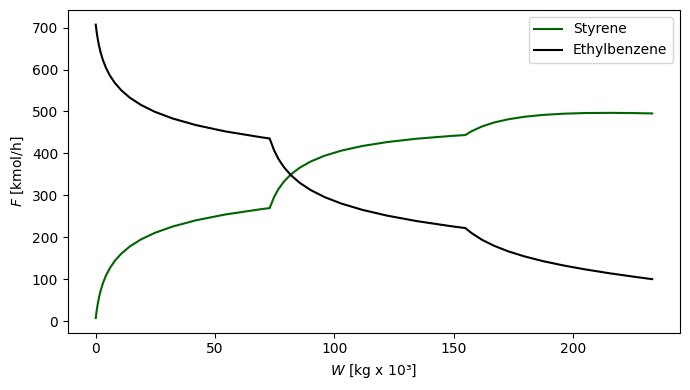

In [7]:
fig, ax = plt.subplots(figsize=[7, 4], dpi=100, sharex=True)

ax.plot(profiles.index * 1e-3, profiles["Fst"], color="darkgreen", label="Styrene")
ax.plot(profiles.index * 1e-3, profiles["Feb"], color="black", label="Ethylbenzene")

ax.set_ylabel("$F$ [kmol/h]")
ax.set_xlabel("$W$ [kg x 10³]")

ax.legend()

fig.tight_layout()
plt.savefig("../data/composition_profiles_example.png")
plt.show()